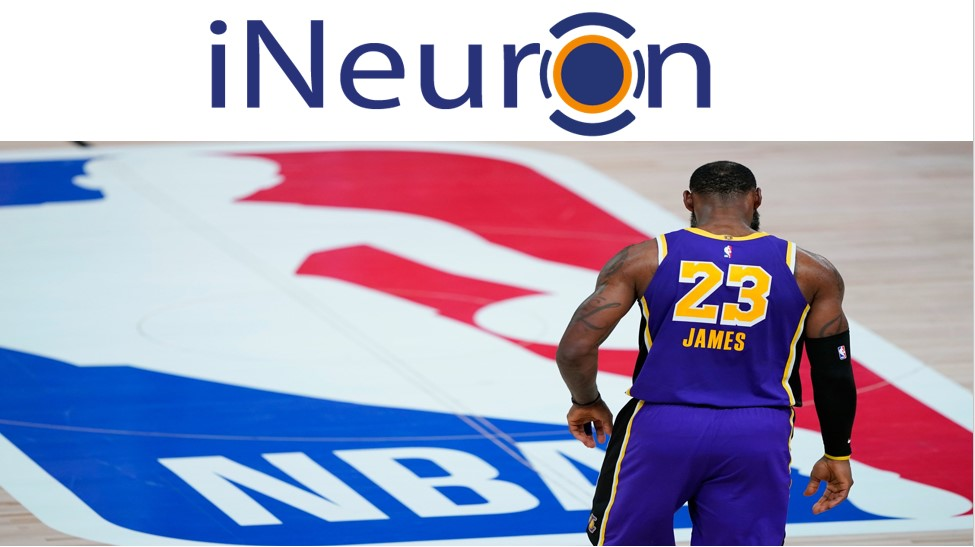

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import cufflinks as cf
import plotly.express as px
import chart_studio.plotly as py
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()
import plotly.figure_factory as ff
from sklearn.impute import SimpleImputer
%matplotlib inline

In [2]:
df1=pd.read_csv(r"2012_nba_draft_combine.csv")
df2=pd.read_csv(r"2013_nba_draft_combine.csv")
df3=pd.read_csv(r"2014_nba_draft_combine.csv")
df4=pd.read_csv(r"2015_nba_draft_combine.csv")
df5=pd.read_csv(r"2016_nba_draft_combine.csv")

In [3]:
df=pd.concat([df1,df2,df3,df4,df5],ignore_index=True,axis=0)

In [4]:
df.head()

,Unnamed: 0,Player,Year,Draft pick,Height (No Shoes),Height (With Shoes),Wingspan,Standing reach,Vertical (Max),Vertical (Max Reach),Vertical (No Step),Vertical (No Step Reach),Weight,Body Fat,Hand (Length),Hand (Width),Bench,Agility,Sprint
0,0,Andre Drummond,2012,9.0,81.75,83.75,90.25,109.5,33.5,143.0,31.5,141.0,279.0,7.5,9.50,9.50,10.0,10.83,3.39
1,1,Andrew Nicholson,2012,19.0,80.50,81.50,88.00,107.0,30.5,137.5,28.5,135.5,234.0,7.6,10.00,10.75,10.0,11.89,3.67
2,2,Anthony Davis,2012,1.0,81.25,82.50,89.50,108.0,NaN,NaN,NaN,NaN,222.0,7.9,9.00,8.50,NaN,NaN,NaN
3,3,Arnett Moultrie,2012,27.0,81.50,82.75,86.25,106.5,37.5,144.0,33.5,140.0,233.0,7.7,9.25,9.25,10.0,11.32,3.22
4,4,Austin Rivers,2012,10.0,75.50,77.00,79.25,96.5,37.5,134.0,32.5,129.0,203.0,6.2,8.50,10.00,1.0,11.54,3.32


In [5]:
df=df.iloc[:,1:]

In [6]:
df.head()

,Player,Year,Draft pick,Height (No Shoes),Height (With Shoes),Wingspan,Standing reach,Vertical (Max),Vertical (Max Reach),Vertical (No Step),Vertical (No Step Reach),Weight,Body Fat,Hand (Length),Hand (Width),Bench,Agility,Sprint
0,Andre Drummond,2012,9.0,81.75,83.75,90.25,109.5,33.5,143.0,31.5,141.0,279.0,7.5,9.50,9.50,10.0,10.83,3.39
1,Andrew Nicholson,2012,19.0,80.50,81.50,88.00,107.0,30.5,137.5,28.5,135.5,234.0,7.6,10.00,10.75,10.0,11.89,3.67
2,Anthony Davis,2012,1.0,81.25,82.50,89.50,108.0,NaN,NaN,NaN,NaN,222.0,7.9,9.00,8.50,NaN,NaN,NaN
3,Arnett Moultrie,2012,27.0,81.50,82.75,86.25,106.5,37.5,144.0,33.5,140.0,233.0,7.7,9.25,9.25,10.0,11.32,3.22
4,Austin Rivers,2012,10.0,75.50,77.00,79.25,96.5,37.5,134.0,32.5,129.0,203.0,6.2,8.50,10.00,1.0,11.54,3.32


In [7]:
df.shape

(306, 18)

# Data Cleaning With analysing Features

### Handing Missing/NaN Values

In [8]:
imputer_mean = SimpleImputer(missing_values = np.nan,
                        strategy ='mean')
imputer_median = SimpleImputer(missing_values = np.nan,
                        strategy ='median')
imputer_mode= SimpleImputer(missing_values = np.nan,
                        strategy ='most_frequent')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Player                    306 non-null    object 
 1   Year                      306 non-null    int64  
 2   Draft pick                215 non-null    float64
 3   Height (No Shoes)         306 non-null    float64
 4   Height (With Shoes)       306 non-null    float64
 5   Wingspan                  306 non-null    float64
 6   Standing reach            306 non-null    float64
 7   Vertical (Max)            257 non-null    float64
 8   Vertical (Max Reach)      257 non-null    float64
 9   Vertical (No Step)        258 non-null    float64
 10  Vertical (No Step Reach)  258 non-null    float64
 11  Weight                    305 non-null    float64
 12  Body Fat                  305 non-null    float64
 13  Hand (Length)             306 non-null    float64
 14  Hand (Widt

In [10]:
df.isnull().sum()

Player                        0
Year                          0
Draft pick                   91
Height (No Shoes)             0
Height (With Shoes)           0
Wingspan                      0
Standing reach                0
Vertical (Max)               49
Vertical (Max Reach)         49
Vertical (No Step)           48
Vertical (No Step Reach)     48
Weight                        1
Body Fat                      1
Hand (Length)                 0
Hand (Width)                  0
Bench                       157
Agility                      52
Sprint                       53
dtype: int64

## Columns with Null value :-
                                   Draft Pick
                                   Vertical(max)
                                   Vertical(max reach)
                                   Vertical(no step)
                                   Vertical(no step reach)
                                   weight
                                   body fat
                                   bench
                                   agility
                                   sprint
                                   

### Draft Pick column

In [11]:
df["Draft pick"].unique()

array([ 9., 19.,  1., 27., 10., 33.,  3.,  6., 55., 46.,  4., 42., 35.,
       nan, 22., 30.,  7., 34., 24., 21., 31., 12., 14., 23., 13., 47.,
       39., 44., 51., 49., 59., 29., 11.,  2., 43., 26., 15., 36., 28.,
       37., 38., 58., 16., 18.,  8.,  5., 32., 25., 17., 41., 40., 53.,
       50., 52., 56., 48., 20., 60., 45., 54.])

In [12]:
df["Draft pick"].describe(include="all")

count    215.000000
mean      29.000000
std       16.127413
min        1.000000
25%       15.000000
50%       29.000000
75%       42.000000
max       60.000000
Name: Draft pick, dtype: float64

In [13]:
df["Draft pick"].value_counts()

9.0     5
18.0    5
17.0    5
34.0    5
49.0    5
22.0    5
8.0     5
42.0    5
6.0     5
36.0    5
33.0    5
10.0    5
37.0    5
14.0    5
43.0    4
13.0    4
11.0    4
19.0    4
28.0    4
51.0    4
44.0    4
25.0    4
12.0    4
23.0    4
30.0    4
27.0    4
46.0    4
56.0    4
58.0    4
38.0    4
40.0    4
24.0    4
21.0    4
41.0    4
32.0    3
5.0     3
48.0    3
20.0    3
45.0    3
50.0    3
59.0    3
26.0    3
2.0     3
29.0    3
39.0    3
47.0    3
31.0    3
7.0     3
15.0    3
35.0    3
4.0     3
55.0    3
3.0     3
16.0    2
52.0    2
1.0     1
53.0    1
60.0    1
54.0    1
Name: Draft pick, dtype: int64

C:\users\rudransh\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Draft pick', ylabel='count'>

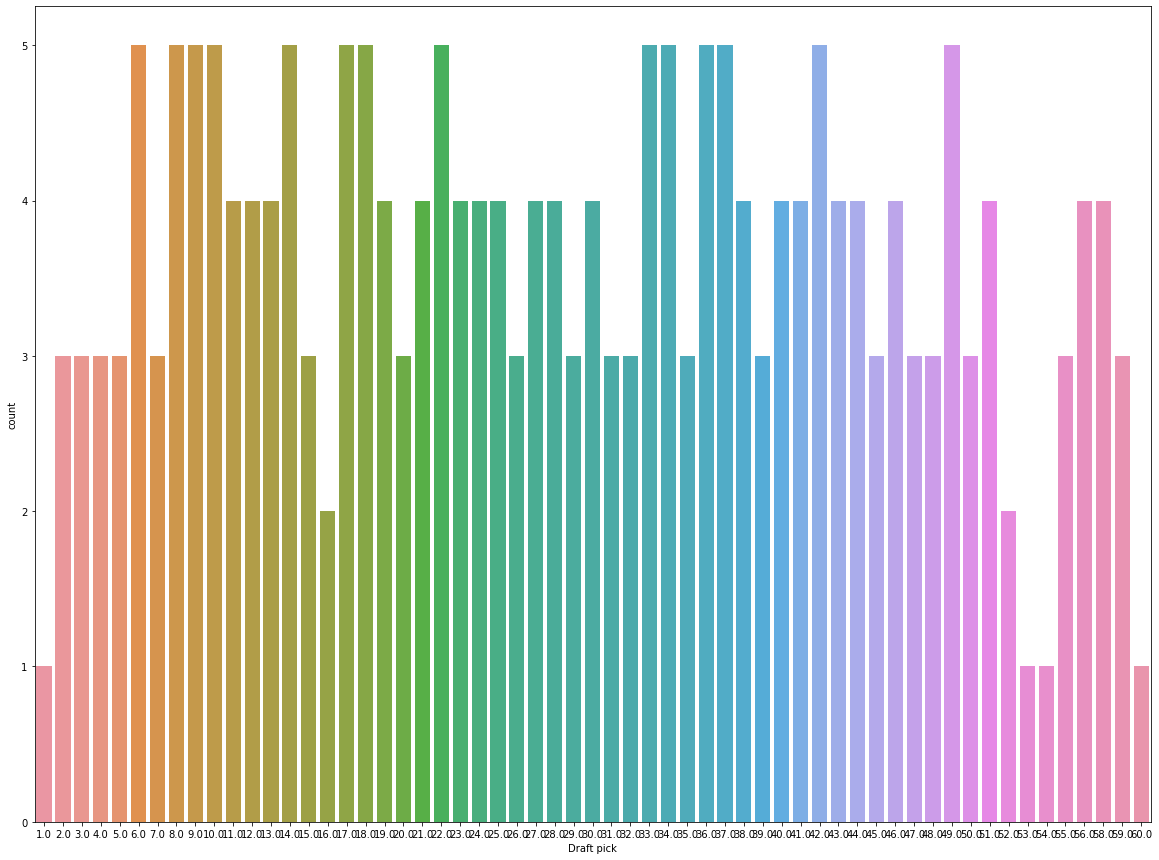

In [14]:
plt.figure(figsize=(20,15))
sns.countplot("Draft pick",data=df)

In [15]:
df["Draft pick"]=imputer_mean.fit_transform(np.array(df["Draft pick"]).reshape(-1,1))

In [16]:
df["Draft pick"].isnull().sum().any()

False

In [17]:
df["Draft pick"]=df["Draft pick"].astype(int)

  ## Vertical (max) Column

In [18]:
df["Vertical (Max)"].unique()

array([33.5, 30.5,  nan, 37.5, 32.5, 39. , 39.5, 41.5, 37. , 33. , 34. ,
       31. , 29.5, 36.5, 34.5, 40. , 38. , 30. , 35. , 31.5, 40.5, 35.5,
       38.5, 36. , 42. , 32. , 29. , 41. , 44. , 43.5, 28.5, 25. , 43. ,
       28. ])

In [19]:
type(df["Vertical (Max)"][0])

numpy.float64

In [20]:
df["Vertical (Max)"].describe(include="all")

count    257.000000
mean      35.638132
std        3.595704
min       25.000000
25%       33.000000
50%       35.500000
75%       38.000000
max       44.000000
Name: Vertical (Max), dtype: float64

In [21]:
df["Vertical (Max)"].value_counts()

35.5    22
36.5    16
34.5    15
37.5    15
36.0    13
38.0    12
37.0    12
34.0    12
32.5    11
31.0    10
33.5    10
39.5    10
35.0     9
40.5     9
31.5     8
38.5     8
32.0     8
29.5     7
33.0     6
40.0     6
41.5     6
29.0     4
44.0     3
28.5     3
43.0     3
43.5     3
30.0     3
41.0     3
30.5     3
39.0     3
42.0     2
25.0     1
28.0     1
Name: Vertical (Max), dtype: int64

C:\users\rudransh\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Vertical (Max)', ylabel='count'>

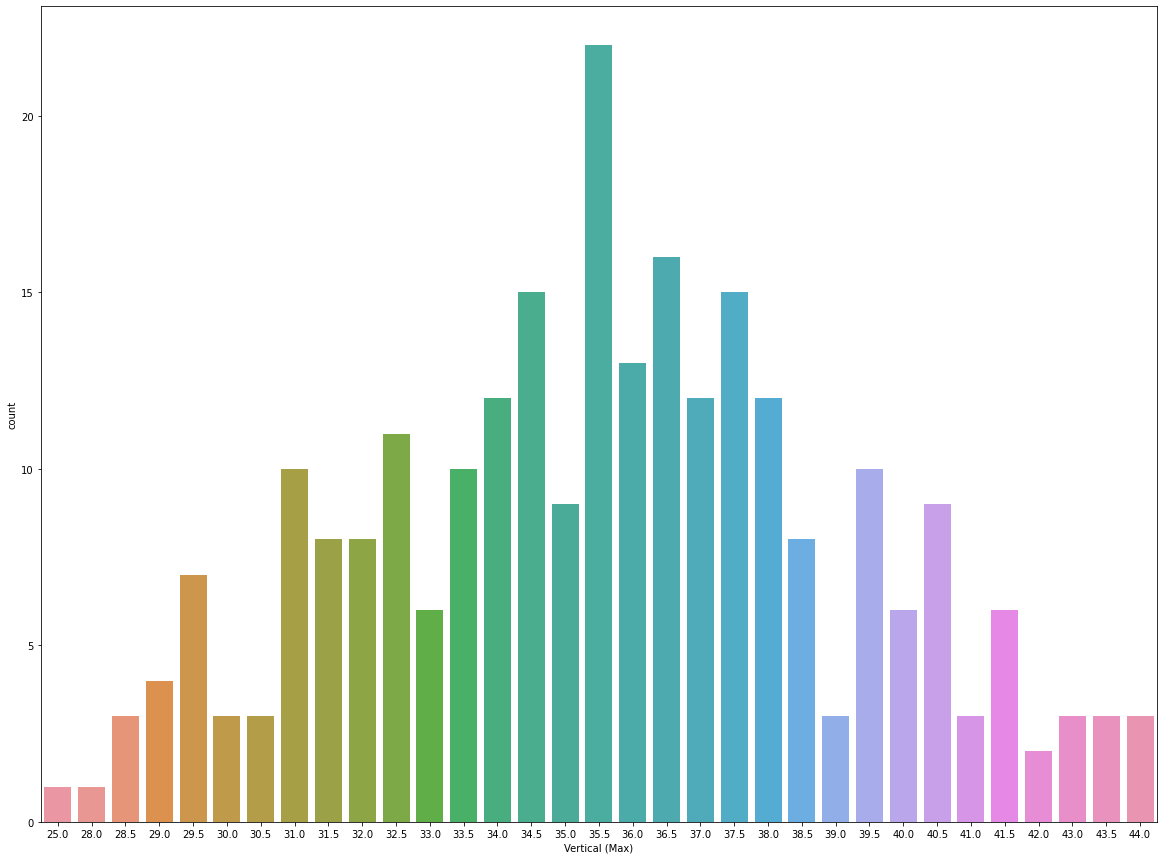

In [22]:
plt.figure(figsize=(20,15))
sns.countplot("Vertical (Max)",data=df)

In [23]:
# using mode
df["Vertical (Max)"]=imputer_mode.fit_transform(np.array(df["Vertical (Max)"]).reshape(-1,1))

In [24]:
px.pie(df,values=df["Vertical (Max)"].value_counts(),names=df["Vertical (Max)"].unique())

In [25]:
## 23% of tatal vertical (max) having value 71

In [26]:
df["Vertical (Max)"].isnull().any()

False

## Vertical (Max reach) Column

In [27]:
df["Vertical (Max Reach)"].unique()

array([143. , 137.5,   nan, 144. , 134. , 141. , 139. , 135. , 138. ,
       132. , 141.5, 125.5, 136.5, 140. , 142. , 134.5, 129. , 133. ,
       135.5, 137. , 140.5, 146. , 139.5, 138.5, 145.5, 143.5, 127. ,
       129.5, 142.5, 145. , 136. , 144.5, 131.5, 130.5, 133.5, 126.5,
       128.5, 132.5, 127.5, 128. , 147. ])

In [28]:
df["Vertical (Max Reach)"].describe()

count    257.000000
mean     138.093385
std        4.220605
min      125.500000
25%      135.000000
50%      138.500000
75%      141.500000
max      147.000000
Name: Vertical (Max Reach), dtype: float64

In [29]:
df["Vertical (Max Reach)"].value_counts()

138.0    20
139.5    14
141.5    13
138.5    12
134.0    12
141.0    12
136.5    12
142.0    12
144.0    11
139.0    11
137.5    11
140.5     9
135.0     9
140.0     8
134.5     8
137.0     7
143.5     6
142.5     6
133.5     6
136.0     6
143.0     6
135.5     5
133.0     5
132.0     5
144.5     4
132.5     3
145.0     3
145.5     2
127.0     2
129.5     2
129.0     2
128.0     2
131.5     2
130.5     2
126.5     2
127.5     1
146.0     1
128.5     1
125.5     1
147.0     1
Name: Vertical (Max Reach), dtype: int64

C:\users\rudransh\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Vertical (Max Reach)', ylabel='count'>

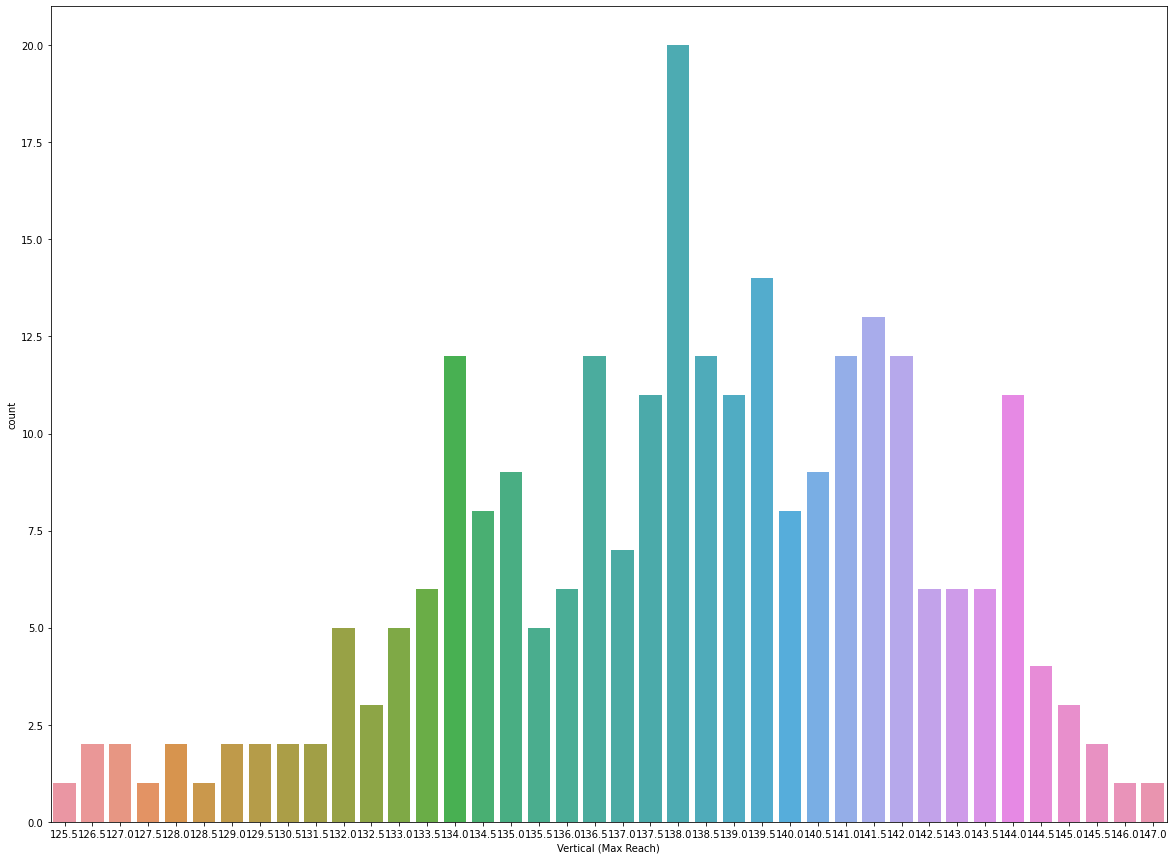

In [30]:
plt.figure(figsize=(20,15))
sns.countplot("Vertical (Max Reach)",data=df)

In [31]:
# using mean
df["Vertical (Max Reach)"]=imputer_mean.fit_transform(np.array(df["Vertical (Max Reach)"]).reshape(-1,1))

C:\users\rudransh\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Vertical (Max Reach)', ylabel='count'>

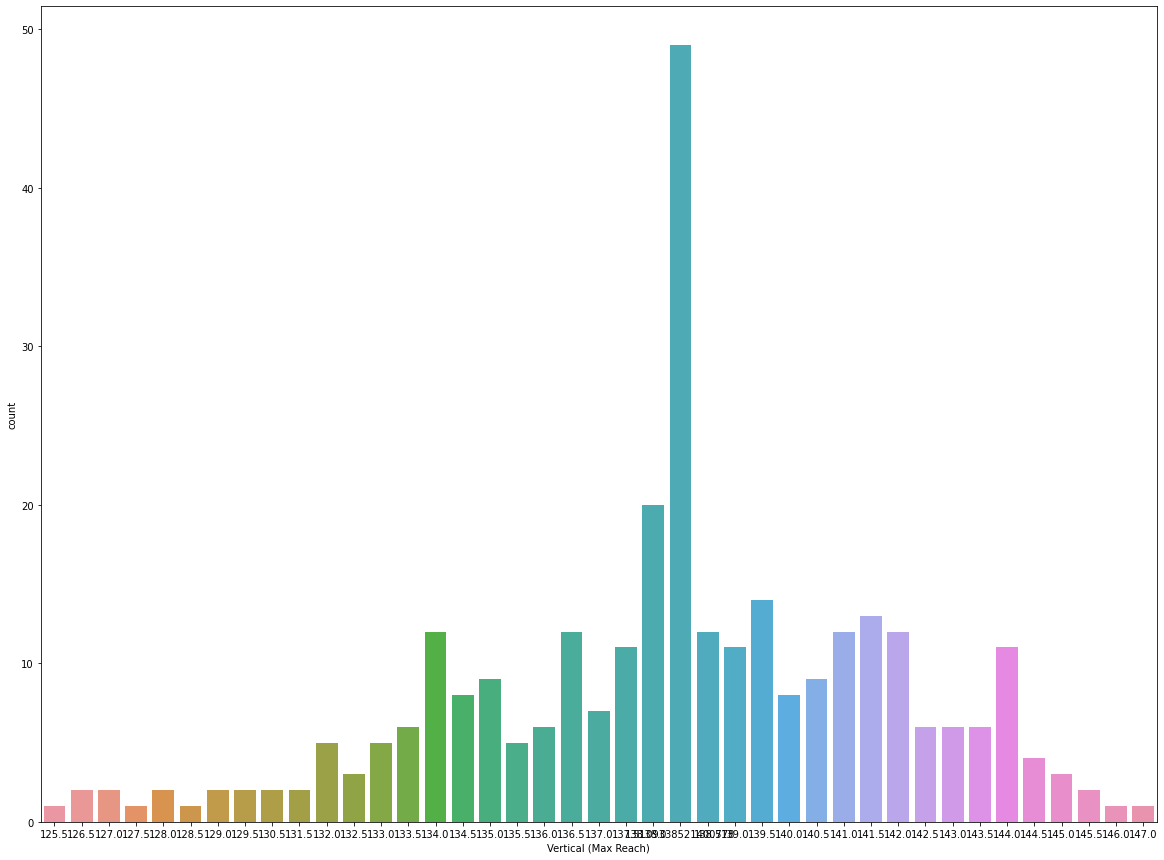

In [32]:
plt.figure(figsize=(20,15))
sns.countplot("Vertical (Max Reach)",data=df)

In [33]:
## by using mean in place of nan we have most frequent vale as mean

In [34]:
df["Vertical (Max Reach)"].isna().any()

False

## Vertical (No Step Reach) Column

In [35]:
df["Vertical (No Step Reach)"].unique()

array([141. , 135.5,   nan, 140. , 129. , 138.5, 133. , 130. , 129.5,
       134. , 127.5, 132.5, 139.5, 142. , 134.5, 131. , 122. , 136. ,
       130.5, 135. , 133.5, 137.5, 128.5, 125.5, 127. , 138. , 128. ,
       136.5, 121.5, 131.5, 122.5, 132. , 137. , 141.5, 140.5, 126.5,
       125. , 124. , 123.5, 139. , 126. , 124.5, 121. , 143. , 119. ,
       142.5, 144. ])

In [36]:
df["Vertical (No Step Reach)"].value_counts()

131.0    15
134.5    14
133.0    14
132.5    12
132.0    10
129.0    10
135.0    10
136.0    10
131.5    10
129.5     9
138.0     9
128.0     8
133.5     8
135.5     8
137.0     8
134.0     7
127.5     6
136.5     6
130.0     6
138.5     6
137.5     6
128.5     6
140.0     6
127.0     6
130.5     5
126.5     5
139.0     4
139.5     4
125.5     3
124.5     3
123.5     3
121.0     2
124.0     2
125.0     2
141.0     2
140.5     2
122.5     2
141.5     1
121.5     1
126.0     1
122.0     1
142.0     1
143.0     1
119.0     1
142.5     1
144.0     1
Name: Vertical (No Step Reach), dtype: int64

In [37]:
df["Vertical (No Step Reach)"]=imputer_mean.fit_transform(np.array(df["Vertical (No Step Reach)"]).reshape(-1,1))

## Vertical (No step) Column

In [38]:
df["Vertical (No Step)"]=imputer_mean.fit_transform(np.array(df["Vertical (No Step)"]).reshape(-1,1))

## Weight and Body Fat Column

In [39]:
df["Weight"]=imputer_mean.fit_transform(np.array(df["Weight"]).reshape(-1,1))
df["Body Fat"]=imputer_mean.fit_transform(np.array(df["Body Fat"]).reshape(-1,1))

# bench column
                                 

In [40]:
df["Bench"].describe()

count    149.000000
mean       9.463087
std        4.728470
min        1.000000
25%        6.000000
50%        9.000000
75%       13.000000
max       21.000000
Name: Bench, dtype: float64

C:\users\rudransh\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Bench', ylabel='count'>

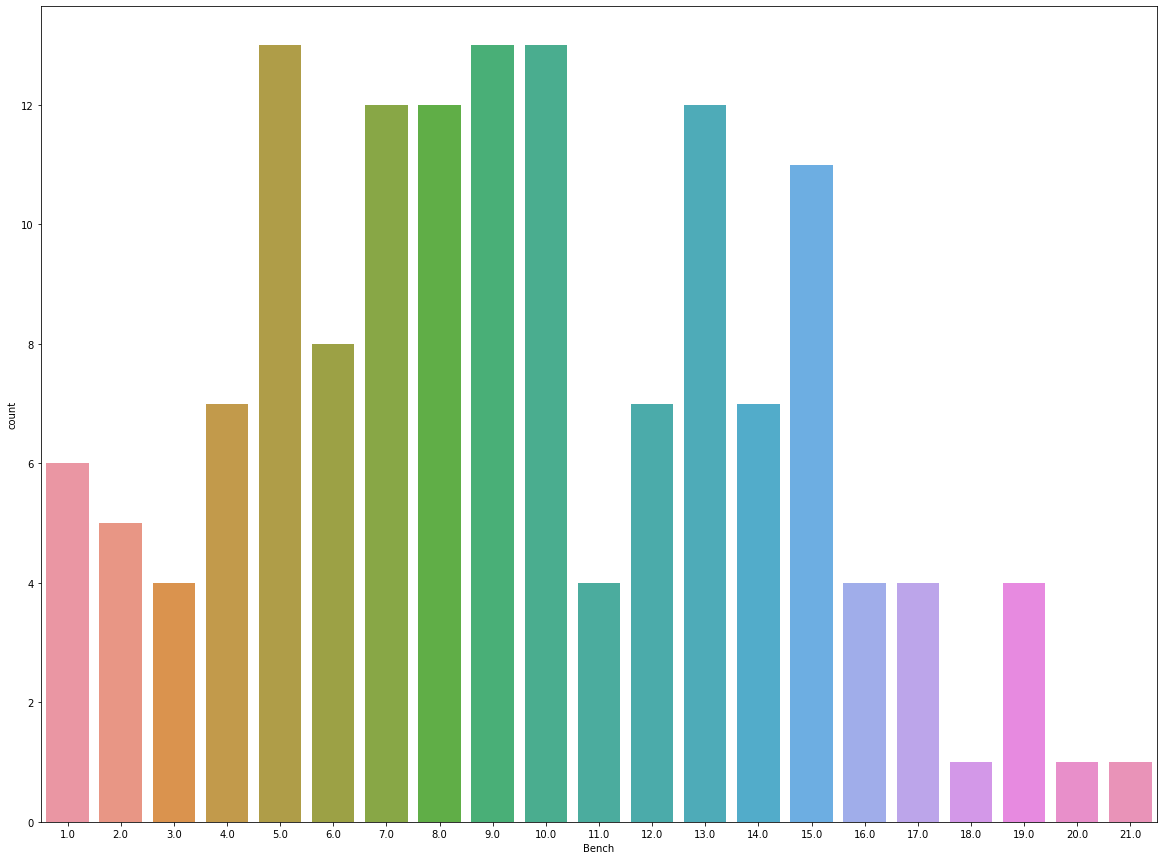

In [41]:
plt.figure(figsize=(20,15))
sns.countplot("Bench",data=df)

In [42]:
# Because this column have 50 % data null s we drop this column

df.drop(columns=["Bench"],inplace=True)

## agility and sprint

In [43]:
df["Agility"].describe()

count    254.000000
mean      11.293307
std        0.547450
min       10.190000
25%       10.870000
50%       11.245000
75%       11.617500
max       12.940000
Name: Agility, dtype: float64

In [44]:
#using mean
df["Agility"]=imputer_mean.fit_transform(np.array(df["Agility"]).reshape(-1,1))

In [45]:
df["Sprint"].describe()

count    253.000000
mean       3.322292
std        0.126877
min        3.020000
25%        3.240000
50%        3.300000
75%        3.400000
max        3.810000
Name: Sprint, dtype: float64

In [46]:
# using mean
df["Sprint"]=imputer_mean.fit_transform(np.array(df["Sprint"]).reshape(-1,1))

In [47]:
df.head()

,Player,Year,Draft pick,Height (No Shoes),Height (With Shoes),Wingspan,Standing reach,Vertical (Max),Vertical (Max Reach),Vertical (No Step),Vertical (No Step Reach),Weight,Body Fat,Hand (Length),Hand (Width),Agility,Sprint
0,Andre Drummond,2012,9,81.75,83.75,90.25,109.5,33.5,143.000000,31.500000,141.000000,279.0,7.5,9.50,9.50,10.830000,3.390000
1,Andrew Nicholson,2012,19,80.50,81.50,88.00,107.0,30.5,137.500000,28.500000,135.500000,234.0,7.6,10.00,10.75,11.890000,3.670000
2,Anthony Davis,2012,1,81.25,82.50,89.50,108.0,35.5,138.093385,30.127907,132.614341,222.0,7.9,9.00,8.50,11.293307,3.322292
3,Arnett Moultrie,2012,27,81.50,82.75,86.25,106.5,37.5,144.000000,33.500000,140.000000,233.0,7.7,9.25,9.25,11.320000,3.220000
4,Austin Rivers,2012,10,75.50,77.00,79.25,96.5,37.5,134.000000,32.500000,129.000000,203.0,6.2,8.50,10.00,11.540000,3.320000


## ----------------------------------------------------------------------------------------------------------------------------------

# Statistical analysis On data

In [48]:
df.describe()

,Year,Draft pick,Height (No Shoes),Height (With Shoes),Wingspan,Standing reach,Vertical (Max),Vertical (Max Reach),Vertical (No Step),Vertical (No Step Reach),Weight,Body Fat,Hand (Length),Hand (Width),Agility,Sprint
count,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000
mean,2014.003268,29.000000,77.554739,78.837418,82.504085,102.781046,35.616013,138.093385,30.127907,132.614341,213.560656,7.118033,8.664542,9.208333,11.293307,3.322292
std,1.417683,13.508953,3.329769,3.316056,3.909764,4.906112,3.294621,3.866739,2.780364,4.268788,23.951120,2.411578,0.734083,1.251597,0.498603,0.115328
min,2012.000000,1.000000,68.250000,69.500000,70.000000,88.500000,25.000000,125.500000,22.500000,119.000000,149.000000,3.200000,-1.000000,-1.000000,10.190000,3.020000
25%,2013.000000,21.000000,75.250000,76.750000,79.812500,99.500000,34.000000,136.500000,28.500000,130.125000,196.000000,5.300000,8.350000,8.750000,10.960000,3.250000
50%,2014.000000,29.000000,77.500000,79.000000,82.750000,103.000000,35.500000,138.093385,30.127907,132.614341,212.500000,6.500000,8.750000,9.250000,11.293307,3.322292
75%,2015.000000,36.750000,79.937500,81.000000,85.750000,106.500000,37.500000,140.875000,32.000000,135.000000,232.000000,8.400000,9.000000,9.750000,11.550000,3.380000
max,2016.000000,60.000000,85.250000,86.250000,92.500000,115.000000,44.000000,147.000000,38.000000,144.000000,279.000000,16.300000,10.000000,11.750000,12.940000,3.810000


In [49]:
df.columns

Index(['Player', 'Year', 'Draft pick', 'Height (No Shoes)',
       'Height (With Shoes)', 'Wingspan', 'Standing reach', 'Vertical (Max)',
       'Vertical (Max Reach)', 'Vertical (No Step)',
       'Vertical (No Step Reach)', 'Weight', 'Body Fat', 'Hand (Length)',
       'Hand (Width)', 'Agility', 'Sprint'],
      dtype='object')

In [50]:
df.iplot()

In [51]:
plt.figure(figsize=(20,15))
df.iplot(kind="box")

<Figure size 1440x1080 with 0 Axes>

## Year wise player picking

In [52]:
plt.figure(figsize=(10,5))
px.bar(df,x="Year",y="Draft pick")

<Figure size 720x360 with 0 Axes>

In [53]:
## every year the player picking goes high
## in 2016 the drafting is more as compare to 2012,13,14, and 15

## Height without Shoes and Draft picking of player

In [54]:
plt.figure(figsize=(15,10))
px.scatter(df,x="Height (With Shoes)",y="Draft pick",
          color="Player")

<Figure size 1080x720 with 0 Axes>

In [55]:
## As The Height Of Player Increases The Draft Picking Is sme how Constant

   ## Height with No Shoes and with shoes 

In [56]:
plt.figure(figsize=(15,10))
px.scatter(df,x="Height (With Shoes)",y="Height (No Shoes)",
          color="Player")

<Figure size 1080x720 with 0 Axes>

In [57]:
## As The Height without shoes increases the height with shoes also increases
## where as there is a small outlier at height with shoes 81

{'whiskers': [<matplotlib.lines.Line2D at 0x2de4e0dc5c0>,
 'caps': [<matplotlib.lines.Line2D at 0x2de4e0dcb70>,
 'boxes': [<matplotlib.patches.PathPatch at 0x2de4e0dc320>],
 'medians': [<matplotlib.lines.Line2D at 0x2de4e0f6160>],
 'fliers': [<matplotlib.lines.Line2D at 0x2de4e0f6438>],
 'means': []}

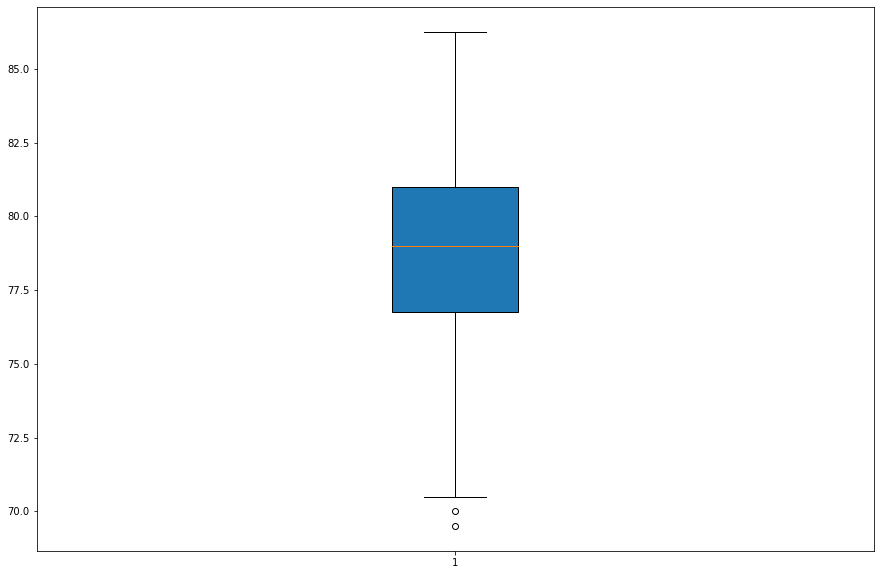

In [58]:
plt.figure(figsize=(15,10))
plt.boxplot(df["Height (With Shoes)"],patch_artist=True)

In [59]:
# there are two outliers in  the series in minimum extream

## Anaysing WingSpan with Height (with Shoes)

In [60]:
plt.figure(figsize=(15,10))
px.scatter(df,x="Height (With Shoes)",y="Wingspan",
          color="Player")

<Figure size 1080x720 with 0 Axes>

<AxesSubplot:xlabel='Height (With Shoes)', ylabel='Wingspan'>

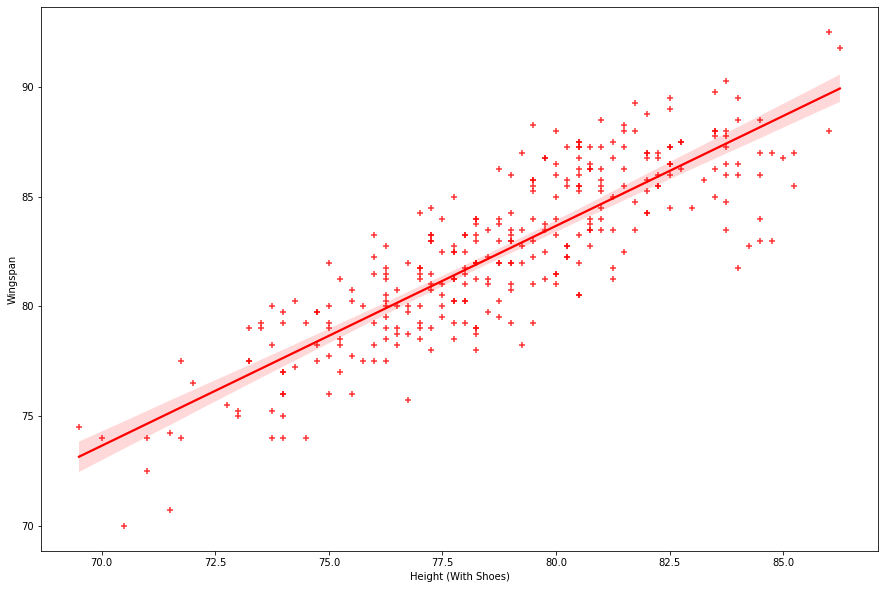

In [61]:
plt.figure(figsize=(15,10))
sns.regplot(x="Height (With Shoes)", y= "Wingspan",data=df,scatter=True, fit_reg=True,color="red",marker="+")

In [62]:
## Graph shows that the Wingspan is linearly depending on Height 

## Height with weight analyzing

In [63]:
plt.figure(figsize=(15,10))
px.scatter(df,x="Height (With Shoes)",y="Weight",
          )

<Figure size 1080x720 with 0 Axes>

{'whiskers': [<matplotlib.lines.Line2D at 0x2de4e8762b0>,
 'caps': [<matplotlib.lines.Line2D at 0x2de4e882c18>,
 'boxes': [<matplotlib.patches.PathPatch at 0x2de4e8824a8>],
 'medians': [<matplotlib.lines.Line2D at 0x2de4e88f208>],
 'fliers': [<matplotlib.lines.Line2D at 0x2de4e88f4e0>],
 'means': []}

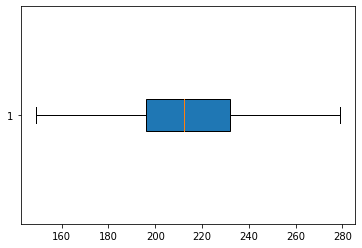

In [64]:
plt.boxplot(df["Weight"],vert=False,patch_artist=True)

In [65]:
## No outlier in weight column
## as the Height of player increases the weight also increases

## Weight and Body Fat Analysis as per height

In [66]:
plt.figure(figsize=(15,10))
px.scatter(df,y="Body Fat",x="Weight",
          )

<Figure size 1080x720 with 0 Axes>

In [67]:
plt.figure(figsize=(15,10))
px.line(df,x="Height (No Shoes)",y=["Weight","Body Fat"],labels={"x":"height","y":"Weight and Fat"},title="Weight VS Body Fat")

<Figure size 1080x720 with 0 Axes>

In [68]:
## As the Height Increases the Weight is always goes high
## But the Body Fat is somewhere Constant

In [69]:
df.columns 

Index(['Player', 'Year', 'Draft pick', 'Height (No Shoes)',
       'Height (With Shoes)', 'Wingspan', 'Standing reach', 'Vertical (Max)',
       'Vertical (Max Reach)', 'Vertical (No Step)',
       'Vertical (No Step Reach)', 'Weight', 'Body Fat', 'Hand (Length)',
       'Hand (Width)', 'Agility', 'Sprint'],
      dtype='object')

## Agility 

<AxesSubplot:xlabel='Height (No Shoes)', ylabel='Agility'>

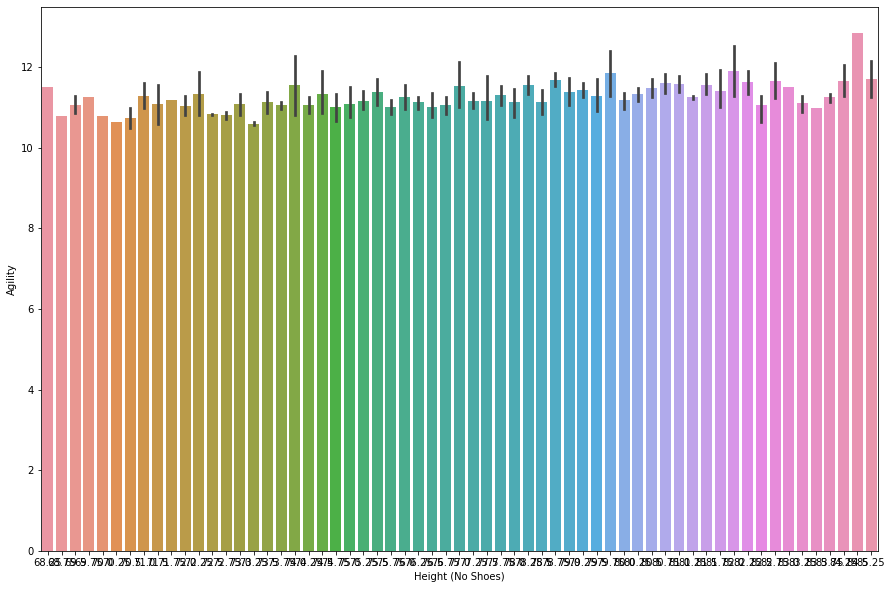

In [70]:
plt.figure(figsize=(15,10))
sns.barplot(x="Height (No Shoes)",y="Agility",data=df)

In [71]:
plt.figure(figsize=(15,10))
px.scatter(df,x="Height (No Shoes)",y="Weight",size="Agility",color="Player")

<Figure size 1080x720 with 0 Axes>

In [72]:
## Graph shows that the Agility is Constant for every player 
## it does nt depend on height or Weight 
## so we may delete this column

In [73]:
new_df=df.drop("Agility",axis=1)

In [74]:
new_df.head()

,Player,Year,Draft pick,Height (No Shoes),Height (With Shoes),Wingspan,Standing reach,Vertical (Max),Vertical (Max Reach),Vertical (No Step),Vertical (No Step Reach),Weight,Body Fat,Hand (Length),Hand (Width),Sprint
0,Andre Drummond,2012,9,81.75,83.75,90.25,109.5,33.5,143.000000,31.500000,141.000000,279.0,7.5,9.50,9.50,3.390000
1,Andrew Nicholson,2012,19,80.50,81.50,88.00,107.0,30.5,137.500000,28.500000,135.500000,234.0,7.6,10.00,10.75,3.670000
2,Anthony Davis,2012,1,81.25,82.50,89.50,108.0,35.5,138.093385,30.127907,132.614341,222.0,7.9,9.00,8.50,3.322292
3,Arnett Moultrie,2012,27,81.50,82.75,86.25,106.5,37.5,144.000000,33.500000,140.000000,233.0,7.7,9.25,9.25,3.220000
4,Austin Rivers,2012,10,75.50,77.00,79.25,96.5,37.5,134.000000,32.500000,129.000000,203.0,6.2,8.50,10.00,3.320000


## Sprint Analysis

In [75]:
plt.figure(figsize=(15,10))
px.scatter(new_df,x="Height (No Shoes)",y="Weight",size="Sprint",color="Player")

<Figure size 1080x720 with 0 Axes>

In [76]:
## As height increases sprint also increases

In [77]:
plt.figure(figsize=(15,10))
px.scatter(new_df,x="Vertical (Max)",y="Height (No Shoes)",color="Player",size="Sprint")

<Figure size 1080x720 with 0 Axes>

<AxesSubplot:xlabel='Vertical (Max)', ylabel='Height (No Shoes)'>

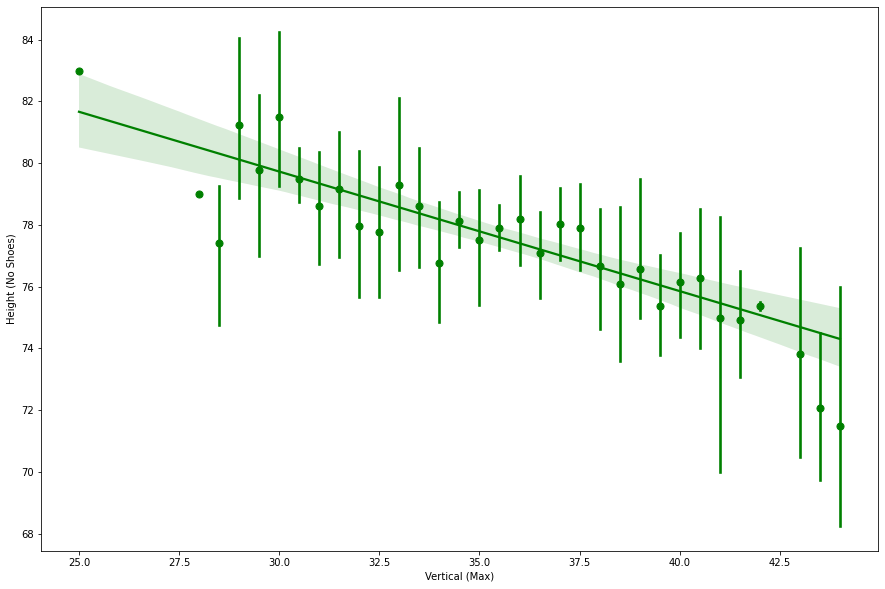

In [78]:
plt.figure(figsize=(15,10))
sns.regplot(x="Vertical (Max)", y= "Height (No Shoes)",data=df,scatter=True, fit_reg=True,color="green",x_estimator=np.mean)

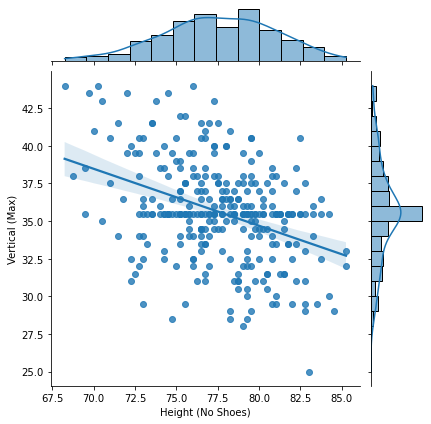

In [79]:
sns.jointplot(x="Height (No Shoes)", y="Vertical (Max)", data=new_df, kind="reg")

In [80]:
## Height having negative slope with veertical (max)
## two points data diverge fron the mean estimator
## Only one person having vertical max 25.0 is a outlier

## relation between vertical (max) and vertical(max reach)

<AxesSubplot:xlabel='Vertical (Max)', ylabel='Vertical (Max Reach)'>

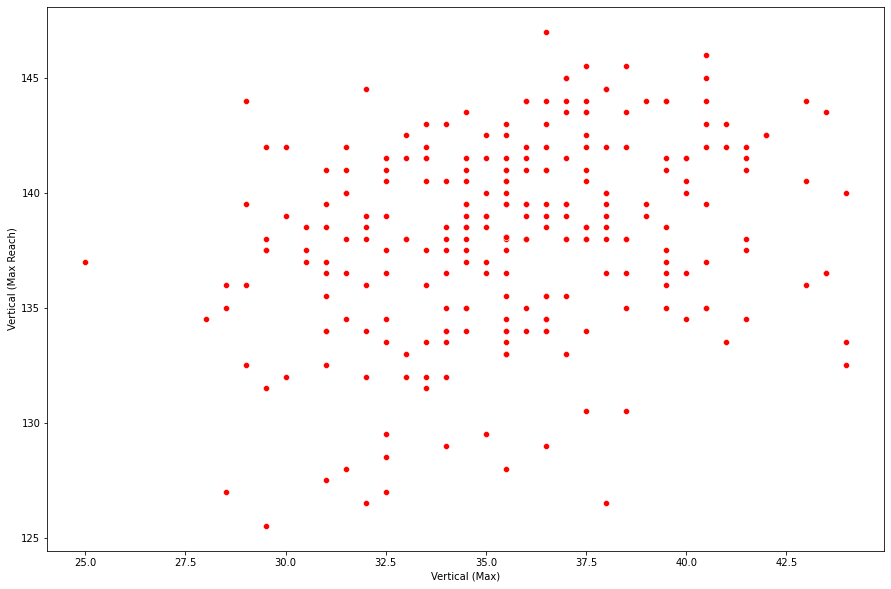

In [81]:
plt.figure(figsize=(15,10))
sns.scatterplot(x="Vertical (Max)",y="Vertical (Max Reach)",data=new_df,color="red")

In [82]:
## the above graph shows that only 1 person having vertical max with vertical max reach both
## most pf the person are in between 130- 245 vertical max reach

## Relation Between Hand (Length) and Hand (Width) 

<AxesSubplot:xlabel='Hand (Length)', ylabel='Hand (Width)'>

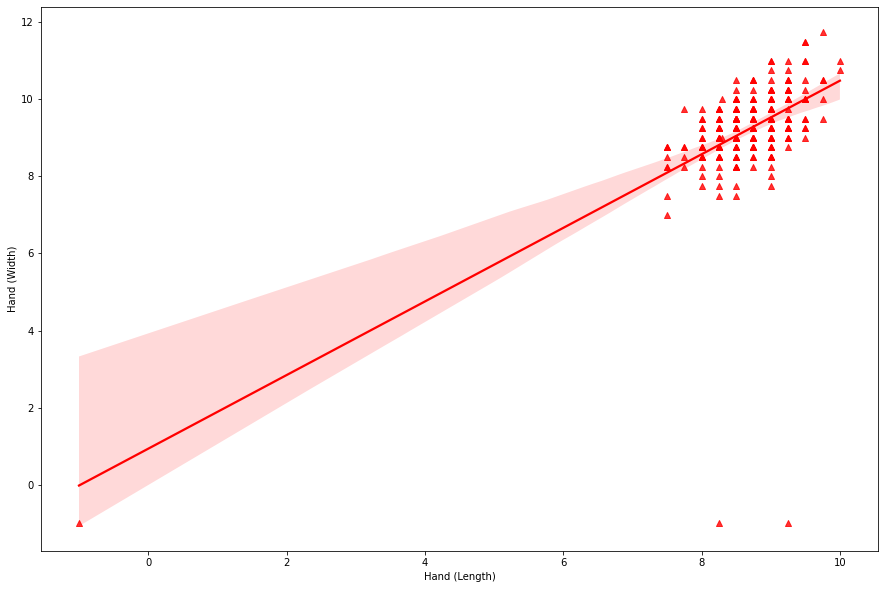

In [83]:
plt.figure(figsize=(15,10))
sns.regplot(x="Hand (Length)", y="Hand (Width)",data=new_df,fit_reg=True,scatter=True,color="red",marker="^")

In [84]:
## the hand length and width are linearly dependent on each other with intercept=7
## there are 2 outliers 

## Relation between WingSpan with Sum of Hand Width and Length

In [85]:
new_df.columns

Index(['Player', 'Year', 'Draft pick', 'Height (No Shoes)',
       'Height (With Shoes)', 'Wingspan', 'Standing reach', 'Vertical (Max)',
       'Vertical (Max Reach)', 'Vertical (No Step)',
       'Vertical (No Step Reach)', 'Weight', 'Body Fat', 'Hand (Length)',
       'Hand (Width)', 'Sprint'],
      dtype='object')

In [86]:
plt.figure(figsize=(15,10))
px.line(df,x="Hand (Length)",y="Wingspan")

<Figure size 1080x720 with 0 Axes>

In [87]:
## One person having Hand Length -1 which is not possible

In [88]:
plt.figure(figsize=(15,10))
px.line(df,x="Hand (Width)",y="Wingspan")

<Figure size 1080x720 with 0 Axes>

In [89]:
## There are 3 person havine hand Width -1 (NOT Possible)

{'whiskers': [<matplotlib.lines.Line2D at 0x2de50943978>,
 'caps': [<matplotlib.lines.Line2D at 0x2de50943f60>,
 'boxes': [<matplotlib.patches.PathPatch at 0x2de509437f0>],
 'medians': [<matplotlib.lines.Line2D at 0x2de50951550>],
 'fliers': [<matplotlib.lines.Line2D at 0x2de50951828>],
 'means': []}

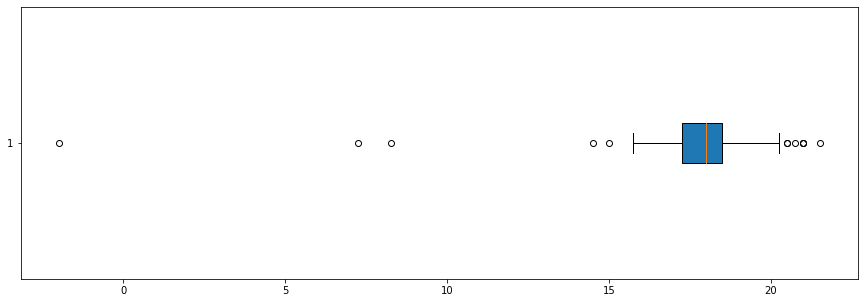

In [90]:
df1=df["Hand (Length)"]+df["Hand (Width)"]
plt.figure(figsize=(15,5))
plt.boxplot(df1,vert=False,patch_artist=True)

In [91]:
## There are Four cluster outliers 
## 3 below the lower extrem and 1 at upper extrem
## IQR is in between 15-20

## Weight with year

In [92]:
new_df.iplot(x="Year",y="Weight",theme="space",xTitle='year',
    yTitle='weights')

In [93]:
## weight decreses with year

## Body fat with years

In [94]:
new_df.iplot(x='Year',y='Body Fat',theme="space",xTitle='year',
    yTitle='body fat')

In [95]:
## Body Fat is Regularly decreases with years

## Analysing 3d Body Fat of players with years

In [96]:
new_df.iplot(x='Year',y='Body Fat',z="Player",theme="space",
             xTitle='year',
            
            yTitle='body fat',
            zTitle="Players",
            kind="scatter3d")

In [97]:
## The above Graph shows that a single  person in 2014  having maximum body Fat of  16.3 named 
## LaQuinton Ross

## Relation between Vertical Max hand( length ) and players

In [ ]:
new_df.iplot(x='Vertical (Max)',y='Hand (Length)',z="Player",theme="space",
             xTitle='vertical max',
             yTitle='Hand (Length)',
             zTitle="Players",
             kind="scatter3d")

In [ ]:
## A Player named kris dunn havine hand length -1 at vertical (max) of 35.5

## Analysis Of sprint of players with year

In [ ]:
new_df.iplot(x='Year',y='Sprint',z="Player",theme="space",
             xTitle='year',
             yTitle='sprint',
             zTitle="Players",
             kind="scatter3d")

In [ ]:
## Sprint decreased with year increases

## 3d scatter plot of wingspan and standing reach of players

In [ ]:
new_df.iplot(kind="scatter3d",x="Wingspan",y="Standing reach",z="Player",theme="space",colorscale="rdylbu",xTitle="Wingspan",
            yTitle="Standing reach",fill=True)

## surface plot of weight and body fat

In [ ]:
new_df.iplot(kind="surface",x="Weight",y="Body Fat",z="Player",theme="space",colorscale="blues",xTitle="Weight",
            yTitle="Body Fat",zTitle="Player")

## Height With Body Fat

In [ ]:
new_df.iplot(kind="surface",x="Height (No Shoes)",y="Body Fat",z="Player",theme="space",colorscale="rdylbu",xTitle="Height (No Shoes)",
            yTitle="Body Fat",zTitle="Player",fill=True)

## Spread Graph Between height vertical (max)  and hand (length)

In [ ]:
new_df[["Height (No Shoes)","Vertical (Max)", "Hand (Length)"]].iplot(kind="spread")

In [ ]:
## Hand (Length is almost Constant)
## Hand Length Decreased sudden between 250 -300

In [ ]:
df.columns

In [ ]:
fig = px.parallel_categories(new_df,color="Weight")

fig.show()

## It takes all those categories whose unique values is less than 50
## Below Graph shows that-

        ## the standing reach is maximum (115) in 2013 at 
                                # 1. Vertical (max)=29
                                # 2. Vertical (Max Reach)=144
                                # 3. vertical(No step) =25
                                # 4. Vertical (No step reach)= 140
                                # 5. hand(length)= 9.75
                                # 6. hand(width)=10

In [ ]:
plt.figure(figsize=(15,10))
new_df.plot(kind="density",x="Year",y="Sprint")

In [ ]:
fig = px.density_contour(new_df, x="Standing reach", y="Sprint",marginal_x="histogram", marginal_y="histogram")
# fig.update_traces(contours_coloring="fill", contours_showlabels = True)
fig.show()

In [ ]:
## The Height is maximum at standing reach of 101 with sprint 3.325 and count of 16
## the probablity of finding  players is more at maximum height

## Violin Plot

### "Vertical (Max)","Vertical (Max Reach)", "Vertical (No Step)","Vertical (No Step Reach)"

In [ ]:
fig = px.violin(new_df,y=["Vertical (Max)","Vertical (Max Reach)", "Vertical (No Step)","Vertical (No Step Reach)"],box=True,
               points="all")
fig.show()

In [ ]:
##  the median value is somewhat same for Vertical (Max) and Vertical( No Step)
##  the median value is somewhat same for Vertical (Max Reach) and Vertical( No  Step reach)

## Hand (Width and Length)

In [ ]:
    fig = px.violin(new_df,y=["Hand (Length)","Hand (Width)"],box=False,
               points="all")
fig.show()

In [ ]:
## 1 out liers for Both Hand Length and Width

## Empirical Commutative Distribution

In [ ]:
fig = px.ecdf(new_df, x=["Vertical (Max)","Vertical (Max Reach)", "Vertical (No Step)","Vertical (No Step Reach)"])
fig.show()

In [ ]:
## the probablity  of Vertical (No Step ) changes suddenly from 0.4 to 0.6 at value 30. 
## the probablity  of Vertical (Max ) changes suddenly from 0.37 to 0.59 at value 35.5. 
## the probablity  of Vertical (No Step ) changes suddenly from 0.4 to 0.5 at value 137. 
## the probablity  of Vertical (No Step ) changes suddenly from 0.4 to 0.6 at value 133.

###### most of the probablity of finding players is sudden changes at value of 30-25 and 130-140

In [ ]:
fig = px.ecdf(new_df,x=["Hand (Length)","Hand (Width)"]
               )
fig.show()

In [ ]:
## the probablity  of player is 0 until the value of Hand (Width) and Hand(Length) is not > 8 

In [ ]:
new_df.iplot(kind="bar",x="Wingspan",y="Standing reach",subplots=True,
                  sortbars=True,theme="henanigans",xTitle ="Wingspan",yTitle="Standing reach")

In [ ]:
##  Standing Reach is maximum at 82 wingspan

In [ ]:
new_df.iplot(kind="line",x="Year",y=["Vertical (Max)","Vertical (No Step)","Vertical (No Step Reach)","Vertical (Max Reach)"],subplots=True,
                  sortbars=True,theme="henanigans",xTitle ="Year")

In [ ]:
## every year all vertical (max ,max reach etc) are affect the players in same cost as one feature

In [ ]:
plt.figure(figsize=(15,10))
sns.pairplot(new_df)

In [ ]:
## as per pair plot the Values of Hand( Length ) And Hand(Width) are almost the same with  features

In [ ]:
new_df.iloc[:,1:].iplot(kind='heatmap')

# Task Completed 


#            By- Rudransh Srivastava 